Los paquetes a usar. Vienen con bibliotecas simples para descargar objetos y bases de datos útiles

In [ ]:
import nltk

# import all the resources for Natural Language Processing with Python
nltk.download("book")
!pip install unidecode
# Regex and standarization
import re
import unidecode
# extra Utils
import random
# Dataframes
!pip3 install pickle5
import pickle5 as pickle
import pandas as pd
# Visualización
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
# Natural Language tk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
from nltk import FreqDist, NaiveBayesClassifier, classify
# XML and html utils
import xml.etree.ElementTree as et
import urllib.request
# subir archivos
from google.colab import files
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None

#Aquí copiamos las bases de datos a nuestro directorio en la nube
! git clone https://github.com/LorenzoLeon/bourbaki_NB_analisis_texto.git

Primero, abramos una base de datos. Hoy vamos a utilizar una lista de tweets mexicanos que usaron el hashtag #covid (o derivados). Estos tweets fueron recopilados directamente desde Twitter.
Por ahora, este archivo es un pickle, o un objeto de python que alguien ya formó (yo) y que guardó para su fácil carga. 
Ustedes solo tendrán que leer el archivo, e inmediatamente tendrán un objeto formato base de datos de Pandas.

In [ ]:
tweets_covid = pd.read_pickle('bourbaki_NB_analisis_texto/01_datos/tweets_small.pickle')
# uploaded = files.upload()
# tweets_covid = pd.read_pickle('tweets_small.pickle')

¿Qué tiene esta base de datos?
Cómo es pandas, podemos acceder a las columnas o filas de la base de datos fácilmente.

In [ ]:
for col in tweets_covid.columns:
    print(col)
  
#tweets_covid.sort_values(by = "id_str").head()
tweets_covid.sort_index().head()

id_str
text
mentions
hashes
user_name
retweeted
inreply
user_followers
fecha
type
value
value2


,id_str,text,mentions,hashes,user_name,retweeted,inreply,user_followers,fecha,type,value,value2
69,1331766676082155520,@h43226013 @Claudiashein Y cuántos niños mexic...,"@h43226013, @Claudiashein","#GobiernoCriminalyCorrupto, #ElPeorGobiernoDeL...",h43226013,1,NaN,1351,2020-11-26T00:08:13Z,negative,99,-1
139,1331772748134281220,"? #ÚLTIMAHORA | Por SEGUNDO día consecutivo, s...","@lopezobrador_, @HLGatell","#ÚLTIMAHORA, #Covid_19, #México",MaryTeTe31,1,NaN,351,2020-11-26T00:32:20Z,positive,88,1
218,1331780180260622336,Reconoce el Subsecretario de Salud @HLGatell l...,@HLGatell,NaN,Micheguti,1,NaN,90,2020-11-26T01:01:52Z,positive,60,1
307,1331788520436936704,@Claudiashein Como jodes con Maradona. Y los ...,@Claudiashein,NaN,Albertus2021,0,1.331724e+18,516,2020-11-26T01:35:01Z,negative,100,-1
319,1331790707451965441,Reconoce el Subsecretario de Salud @HLGatell l...,@HLGatell,NaN,IDEY_oficial,1,NaN,4996,2020-11-26T01:43:42Z,positive,60,1


In [ ]:
# Un ejemplo del texto dentro del tweet número 139
print("text: " + tweets_covid["text"][139])
print("user_name: " + tweets_covid["user_name"][139])
print("fecha: " + tweets_covid["fecha"][139])
#print("id_str: " + tweets_covid["id_str"][139])

text: ? #ÚLTIMAHORA | Por SEGUNDO día consecutivo, se superan los 10 mil casos de #Covid_19 en #México 

103 mil 597 muertes (858 más que ayer) 

Un millón 70 mil 487 casos confirmados (10 mil 335 más que ayer)

Lo que bueno es vamos bien, verdad @lopezobrador_ @HLGatell
user_name: MaryTeTe31
fecha: 2020-11-26T00:32:20Z


**El paquete NLTK**

Este paquete tiene varias funcionalidades que nos permiten extraer palabras, oraciones o incluso raices de las palabras dentro de un texto.
Por ejemplo, ahora vamos a separar cada una de las palabras dentro de el tweet que acabamos de ver. A esto le llamamos, tokenizar. Existen varias maneras de hacerlo. La más sencilla es simplemente partir la oración en las palabras que la constituyen. Pero hay más.

In [ ]:
tokens = word_tokenize(tweets_covid["text"][678023], language="spanish")
tokens

['Mis',
 'respetos',
 'para',
 '@',
 'A__Tapia',
 ',',
 'ayer',
 'día',
 '29',
 ',',
 '?',
 '?',
 'cerró',
 'en',
 '45,361',
 '?',
 '#',
 'Covid_19',
 'a',
 'tan',
 'sólo',
 '600',
 'de',
 '?',
 '?',
 ',',
 'hoy',
 '?',
 '?',
 'ha',
 'rebasado',
 'a',
 'Reino',
 'Unido',
 '?',
 '?',
 'en',
 '?',
 '#',
 'COVID19',
 'para',
 'ocupar',
 'el',
 '3°',
 'lugar',
 'mundial',
 'como',
 'resultado',
 'del',
 'trabajo',
 '(',
 'sic',
 ')',
 'de',
 '@',
 'HLGatell',
 'con',
 '46,000',
 '?',
 'por',
 '45,999',
 '?',
 'de',
 '?',
 '?',
 ',',
 '#',
 'morenavirus',
 '@',
 'obititlan',
 'https',
 ':',
 '//t.co/efM0Vc1Mrc']

¡Mucho mejor! Pero seguimos teniendo muchos símbolos y números que nos son completamente ínutiles. Para eliminarlos, vamos a usar REGEX. Esta herramiente nos permite buscar, encontrar y reemplazar caracteres especiales por lo que queramos. También podemos buscar palabras, oraciones o valores más complicados. 

¿Qué es regex?

In [ ]:
# Este es el texto original
texto = tweets_covid['text'][678023]
texto

'Mis respetos para @A__Tapia, ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @HLGatell con 46,000?por 45,999?de ??, #morenavirus @obititlan https://t.co/efM0Vc1Mrc'

In [ ]:
# Primero, transformemos todo el texto a minúsculas
texto = tweets_covid['text'][678023].lower()
texto

'mis respetos para @a__tapia, ayer día 29, ?? cerró en 45,361?#covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a reino unido ?? en?#covid19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @hlgatell con 46,000?por 45,999?de ??, #morenavirus @obititlan https://t.co/efm0vc1mrc'

In [ ]:
# Eliminemos todos los links
texto = re.sub(r'https?:\/\/\S*', '', texto)
texto

'mis respetos para @a__tapia, ayer día 29, ?? cerró en 45,361?#covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a reino unido ?? en?#covid19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @hlgatell con 46,000?por 45,999?de ??, #morenavirus @obititlan '

In [ ]:
# reemplazemos todas las menciones por @usuario
texto = re.sub(r'@\S*', 'mencionTwitter', texto)
texto

'mis respetos para mencionTwitter ayer día 29, ?? cerró en 45,361?#covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a reino unido ?? en?#covid19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de mencionTwitter con 46,000?por 45,999?de ??, #morenavirus mencionTwitter '

In [ ]:
# Eliminemos todos los caracteres especiales (excepto @) y números
texto = re.sub('[¡|!°$:()-@#.;,_¿`?&\d]', ' ', texto)
texto

'mis respetos para mencionTwitter ayer día        cerró en         covid    a tan sólo     de     hoy    ha rebasado a reino unido    en  covid   para ocupar el    lugar mundial como resultado del trabajo  sic  de mencionTwitter con        por        de      morenavirus mencionTwitter '

In [ ]:
# Eliminemos todos los espacios repetidos (y characteres de espacio como tab, enter, etc) por un solo espacio normal
texto = re.sub(r'\s+', ' ', texto)
texto

'mis respetos para mencionTwitter ayer día cerró en covid a tan sólo de hoy ha rebasado a reino unido en covid para ocupar el lugar mundial como resultado del trabajo sic de mencionTwitter con por de morenavirus mencionTwitter '

In [ ]:
# Eliminemos ahora todos los acentos
texto = unidecode.unidecode(texto)
texto

'mis respetos para mencionTwitter ayer dia cerro en covid a tan solo de hoy ha rebasado a reino unido en covid para ocupar el lugar mundial como resultado del trabajo sic de mencionTwitter con por de morenavirus mencionTwitter '

In [ ]:
# Podemos eliminar también todos los emojis
def deEmojify(text):
    patron_regex = re.compile(pattern = "["
                                          u"\U0001F600-\U0001F64F"  # emoticons
                                          u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                                          u"\U0001F680-\U0001F6FF"  # transporte & símbolos mapas
                                          u"\U0001F1E0-\U0001F1FF"  # banderas0 (iOS)
                                          u"\U00002500-\U00002BEF"  # chinese char
                                          u"\U00002702-\U000027B0"
                                          u"\U00002702-\U000027B0"
                                          u"\U000024C2-\U0001F251"
                                          u"\U0001f926-\U0001f937"
                                          u"\U00010000-\U0010ffff"
                                          u"\u2640-\u2642"
                                          u"\u2600-\u2B55"
                                          u"\u200d"
                                          u"\u23cf"
                                          u"\u23e9"
                                          u"\u231a"
                                          u"\ufe0f"  # dingbats
                                          u"\u3030"
                                          "]+", flags = re.UNICODE)
    return patron_regex.sub(r'emoji ',text)

In [ ]:
# Copiemos nuestra base y apliquemos los filtros y reemplazos que acabamos de crear
tweets_covid_limpia = tweets_covid.copy()
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: deEmojify(x))
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: x.lower())
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: re.sub(r'https?:\/\/\S*' , ''        , x))
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: re.sub(r'@\S*'           , 'mencionTwitter', x))
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: re.sub(r"[\W_\d]"        , ' '       , x))
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: re.sub(r'\s+'            , ' '       , x))
tweets_covid_limpia['text'] = tweets_covid_limpia['text'].apply(lambda x: unidecode.unidecode(x))

¿Por qué no vemos cuáles son las palabras más comunes en nuestros tweets?
Vamos a usar el paquete de WordCloud, y para ello ya tienen una función que nos servirá directamente y además lo mostrará todo en una nube de palabras.

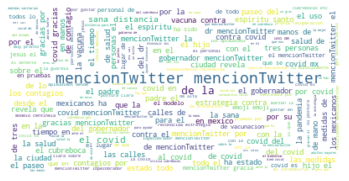

In [ ]:
# Filtramos nuestra base para solo ver los tweets positivos primero
tweets_pos = tweets_covid_limpia[tweets_covid_limpia['type'] == "positive"]
# ahora juntamos todo el texto en un solo texto
union_texto = " ".join([i for i in tweets_pos['text']])
wordcloud = WordCloud(background_color="white").generate(union_texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Cuándo hacemos análisis de texto, buscamos solamente aquellas palabras que nos dan información. Ya que la capacidad de procesamiento es limitada, no queremos que el sistema nos avise cada que encuentra la palabra "el" o "y"... o "o".
Afortunadamente, NLTK contiene listas de este tipo de palabras, listas para utilizar. 

In [ ]:
stop_words_sp = set(stopwords.words('spanish'))
# agregamos algunas más, por ejemplo covid, o menciontwitter que sabemos exactamente lo que dice, esto lo podríamos haber hecho desde el regex

stop_words_sp = stop_words_sp.union(["mencionTwitter", "covid"])

stop_words_sp

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'covid',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 

Ahora sí. Podemos quitarlas de nuestros tweets y ver qué nos queda. Intentemos con el tweet anterior.

In [ ]:
# original
tokens = word_tokenize(tweets_covid_limpia["text"][678023], language="spanish")
tokens

['mis',
 'respetos',
 'para',
 'mencionTwitter',
 'ayer',
 'dia',
 'cerro',
 'en',
 'covid',
 'a',
 'tan',
 'solo',
 'de',
 'hoy',
 'ha',
 'rebasado',
 'a',
 'reino',
 'unido',
 'en',
 'covid',
 'para',
 'ocupar',
 'el',
 'lugar',
 'mundial',
 'como',
 'resultado',
 'del',
 'trabajo',
 'sic',
 'de',
 'mencionTwitter',
 'con',
 'por',
 'de',
 'morenavirus',
 'mencionTwitter']

In [ ]:
oracion_filtrada = [w for w in tokens if not w in stop_words_sp]
oracion_filtrada

['respetos',
 'ayer',
 'dia',
 'cerro',
 'tan',
 'solo',
 'hoy',
 'rebasado',
 'reino',
 'unido',
 'ocupar',
 'lugar',
 'mundial',
 'resultado',
 'trabajo',
 'sic',
 'morenavirus']

Hagamos de nuevo nuestra nube de palabras, pero filtradas. Ahora solamente para los tweets negativos. Afortunadamente, Wordcloud también sabe remover stopwords.

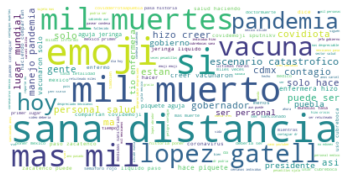

In [ ]:
# Filtramos nuestra base para solo ver los tweets positivos primero
tweets_neg = tweets_covid_limpia[tweets_covid_limpia['type'] == "negative"]
# ahora juntamos todo el texto en un solo texto
union_texto = " ".join([i for i in tweets_neg['text']])
wordcloud = WordCloud(background_color="white", stopwords=stop_words_sp).generate(union_texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Para empezar nuestro análisis necesitamos crear una diccionario de las palabras que aparecen en nuestros tweets.

In [ ]:
todas_las_palabras = []
for fila in tweets_covid_limpia["text"]:
    # for w in word_tokenize(unidecode.unidecode(fila), language="spanish"): # quitando acentos
    for w in word_tokenize(fila, language="spanish"):  # sin quitar acentos
        if w not in stop_words_sp:
            todas_las_palabras.append(w)
# nltk nos permite transformar una lista de palabras repetidas en una lista de frequencias de palabras.
todas_las_palabras = FreqDist(todas_las_palabras)

# Así, podemos guardar las 5000 palabras más utilizadas en nuestro corpus de tweets
palabras_caracteristicas = list(todas_las_palabras.keys())[:5000]

# ahora visualizamos las 15 más comunes y sus frecuencias
todas_las_palabras.most_common(15)

[('mexico', 3794),
 ('mas', 3680),
 ('emoji', 3625),
 ('salud', 2683),
 ('distancia', 2582),
 ('sana', 2419),
 ('cubrebocas', 2382),
 ('pandemia', 2210),
 ('si', 2149),
 ('mil', 2143),
 ('gracias', 1906),
 ('hoy', 1900),
 ('gobernador', 1869),
 ('muertes', 1789),
 ('vacuna', 1762)]

In [ ]:
len(todas_las_palabras)

21688

Ahora vamos a organizar nuestros tweets en una lista con categorías, donde por un lado tengamos una lista de palabras dentro del tweet, y del otro, el sentimiento del tweet.

In [ ]:
corpus = [(list(word_tokenize(text, language="spanish")), sentiment)
                 for sentiment, text in zip(tweets_covid_limpia["type"], tweets_covid_limpia["text"])]
# Así podemos además revolverlo para garantizar que no preferimos ningún tipo de tweet
random.shuffle(corpus)

Para poder procesar nuestro tweet, necesitamos que, en vez de las palabras, nos diga cuáles de las palabras de nuestro diccionario contiene. La siguiente función transforma las palabras en columnas de palabras caracteristicas o "features". Al momento de transformar el texto a una serie de vectores (verdadero o falso) de palabras, decimos que hemos vectorizado una bd de texto.

In [ ]:
def buscar_caracteristicas(document):
    palabras = set(document)
    caracteristicas = {}
    for w in palabras_caracteristicas:
        caracteristicas[w] = (w in palabras)
    return caracteristicas

In [ ]:
text, sentiment = corpus[1]
carac = buscar_caracteristicas(text)
carac

{'envivo': False,
 'inicia': False,
 'cruceinformativo': False,
 'jefa': False,
 'gobierno': False,
 'da': False,
 'positivo': False,
 'declaro': False,
 'tres': False,
 'dias': False,
 'luto': False,
 'nacional': False,
 'memoria': False,
 'fallecidos': False,
 'pandemia': False,
 'derechoalainformacion': False,
 'instruccion': False,
 'presidencial': False,
 'volver': False,
 'rojo': False,
 'primero': False,
 'explotar': False,
 'anaranjados': False,
 'posibles': False,
 'llegar': False,
 'mil': False,
 'muertes': False,
 'covidemoji': False,
 'ocurra': False,
 'morenalapandemiademexico': False,
 'gobernador': False,
 'primer': False,
 'donador': False,
 'plasma': False,
 'hidalgo': False,
 'video': False,
 'deberia': False,
 'ser': False,
 'retuiteado': False,
 'miles': False,
 'veces': False,
 'pesadillas': False,
 'ojala': False,
 'mexico': True,
 'olvide': False,
 'nunca': False,
 'centavos': False,
 'individuo': False,
 'hizo': True,
 'crisis': False,
 'deseo': False,
 'mal': F

Ahora, sí. Procesamos todos los tweets en un set de características basado en el diccionario que creamos. Este es la base que utilizaremos para entrenar y modificar nuestro modelo.

In [ ]:
set_caracteristicas = [buscar_caracteristicas(text)for (text, sentiment) in corpus]

In [ ]:
pd.DataFrame.from_records(set_caracteristicas[:10])

,envivo,inicia,cruceinformativo,jefa,gobierno,da,positivo,declaro,tres,dias,luto,nacional,memoria,fallecidos,pandemia,derechoalainformacion,instruccion,presidencial,volver,rojo,primero,explotar,anaranjados,posibles,llegar,mil,muertes,covidemoji,ocurra,morenalapandemiademexico,gobernador,primer,donador,plasma,hidalgo,video,deberia,ser,retuiteado,miles,...,realizar,investigacion,losperiodistas,impugna,leccion,completo,eu,aproximadamente,logico,duermes,oiga,pare,estupideces,siga,burlandose,difunda,infeccioso,amloenfermomental,reganon,contraria,conferenciacovid,vive,muchmencionTwitter,comerciales,dedico,boicotear,regresa,afectar,afectando,chihuahuense,descendiendo,desvie,loslopezasesinos,controlada,how,mexican,secretary,without,respecting,measures
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

Por ahora, lo guardamos todo con listas pero más adelante, exploraremos diccionarios donde guardemos el sentimiento de cada tweet de manera que podamos utilizar el sentimiento para nuestro modelo de clasificación.  